In [1]:
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def jeffcott(x, t):
    # vetor x = [x0, dxdt0, y0, dydt0] = [x1, x2, x3, x4]    
    
    m=100
    c=20
    k=20000
    m0e=150 #m0*e
    maxw=40
    a=3
    
    wn=sp.sqrt(k/m)
    csi=c/(2*wn)
        
    if a*t < maxw:
            ddphi = a
            dphi = a*t
            phi = (a*t**2)/2
    else:
        ddphi = 0
        dphi = maxw
        phi = maxw*t
        
    A = sp.array([[0, 1, 0, 0], [-k/m, -c/m, 0 , 0], [0, 0, 0, 1], [0, 0, -k/m, -c/m]])
    #calcular dxdt
    f = [0, m0e*dphi**2*sp.cos(phi)/m + m0e*ddphi*sp.sin(phi)/m, 0, m0e*dphi**2*sp.sin(phi)/m - m0e*ddphi*sp.cos(phi)/m]
    
    dxdt = A @ x + f # @ -> multiplicacao matricial
    
    return dxdt

In [3]:
#condicoes iniciais
x0=0.0
dxdt0=0.0
y0=0.0 
dydt0=0.0

z0 = [x0, dxdt0, y0, dydt0] #vetor condicoes iniciais

#tempo
t0 = 0
t = sp.linspace(t0, 50, 10000)

In [4]:
sol=odeint(jeffcott, z0, t)

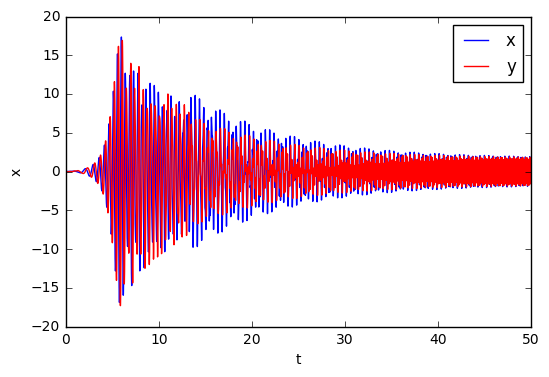

In [9]:
plt.plot(t,sol[:,0], 'b', label='x')
plt.plot(t,sol[:,2], 'r', label='y')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')